# 背景概述

$\quad$1865年, 俄国化学家[门捷列夫(Mendeleev)](https://en.wikipedia.org/wiki/Dmitri_Mendeleev)根据相对原子质量的增长关系所呈现的周期性, 发表了最早版本的[元素周期表(periodic table)](https://en.wikipedia.org/wiki/Periodic_table). 在本次上机作业中, 我们将根据若干元素的原子参数数据, 尝试挖掘这些化学元素中的内禀规律, 并作一个简单的聚类分析.
- 参考文献: [J. Chem. Educ. 2020, 97, 6, 1666–1676](https://pubs.acs.org/doi/10.1021/acs.jchemed.9b00924).

$\quad$由于t-SNE算法的版本更新问题, 可能会输出一些警告(warning). 出于简化, 我们在本次作业中忽略这些警告. 请运行下面的代码块.

In [48]:
import warnings
warnings.simplefilter("ignore")

# 数据读取与清洗

$\quad$请运行下面的代码块, 读入`chem_elements.csv`数据集(已丢弃所有含缺失值的元素).

In [49]:
import pandas as pd
raw_data = pd.read_csv("chem_elements.csv", sep=";").dropna()
raw_data.head()

,Symbol,Name,AtomicMass,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,"YearDiscovered""","""AtomicNumber"
0,H,Hydrogen,1.008,1s1,2.20,120,13.598,0.754,+1-1,Gas,13.81,20.28,0.000090,Nonmetal,"1766""","""1"
1,Li,Lithium,7.000,[He]2s1,0.98,182,5.392,0.618,1,Solid,453.65,1615.00,0.534000,Alkalimetal,"1817""","""3"
3,B,Boron,10.810,[He]2s22p1,2.04,192,8.298,0.277,3,Solid,2348.00,4273.00,2.370000,Metalloid,"1808""","""5"
4,C,Carbon,12.011,[He]2s22p2,2.55,170,11.260,1.263,+4+2-4,Solid,3823.00,4098.00,2.267000,Nonmetal,"Ancient""","""6"
6,O,Oxygen,15.999,[He]2s22p4,3.44,152,13.618,1.461,-2,Gas,54.36,90.20,0.001429,Nonmetal,"1774""","""8"


$\quad$**任务1**: 完成函数`preprocess_chem_elements`的编写, 输入:
- `raw_data`: 原始数据(缺失值已丢弃, 无需额外处理), 为一个`pd.DataFrame`对象;
- `feature_cols`: 一个列表, 用于下游降维/聚类任务的特征列名;
- `idx_col`: 字符串, 用作新的数据表的列名.

要求: (1)根据给定的`idx_col`重新设置表格索引, 并将原索引丢弃; (2) 挑选出原始数据中的`feature_cols`列、并作均值-方差归一化. 最终返回一个处理好的、只含`feature_cols`列的(归一化)数据表, 索引按`idx_col`确定.

### 提示
- 索引重置方法可以参考[`df.reset_index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html#pandas-dataframe-reset-index)方法;
- 归一化可以参考[`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler)模块;
- 可以复习前2次上机作业对于`pandas`库的介绍.

In [50]:
from typing import List
from sklearn.preprocessing import StandardScaler

def preprocess_chem_elements(
    raw_data: pd.DataFrame, feature_cols: List[str],
    idx_col: str="Symbol"
) -> pd.DataFrame:
    data = raw_data.set_index(idx_col)
    features = data[feature_cols]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    features_scaled = pd.DataFrame(features_scaled, index=features.index, columns=features.columns)
    
    return features_scaled

$\quad$完成任务1后, 请运行下面的代码块, 给出处理好的数据表`X`. 我们所选取的特征包括:
- 原子质量`AtomicMass`, 单位u;
- 原子半径`AtomicRadius`, 采取[van der Waals半径](https://en.wikipedia.org/wiki/Van_der_Waals_radius), 单位pm;
- 电离能`IonizationEnery`, 单位eV;
- 电子亲合能`ElectronAffinity`, 单位eV;
- 电负性`Electronegativity`, 采取[Pauling标度](https://en.wikipedia.org/wiki/Electronegativity#Pauling_electronegativity);
- 熔点`MeltingPoint`, 单位K;
- 沸点`BoilingPoint`, 单位K;
- 单质密度`Density`, 单位g/mL.

In [51]:
feature_cols = [
    "AtomicMass",
    "AtomicRadius",
    "IonizationEnergy",
    "ElectronAffinity",
    "Electronegativity",
    "MeltingPoint",
    "BoilingPoint",
    "Density"
]
X = preprocess_chem_elements(
    raw_data,
    feature_cols=feature_cols
)
X

,AtomicMass,AtomicRadius,IonizationEnergy,ElectronAffinity,Electronegativity,MeltingPoint,BoilingPoint,Density
Symbol,,,,,,,,
H,-1.484785,-2.243779,2.194844,-0.369949,0.341005,-1.303907,-1.613774,-1.241627
Li,-1.388654,-0.464566,-1.127539,-0.527923,-1.650809,-0.892769,-0.650228,-1.154716
B,-1.327530,-0.177596,0.049020,-0.924018,0.079783,0.877964,0.955764,-0.855850
C,-1.308262,-0.808930,1.248252,0.221290,0.912427,2.256712,0.850027,-0.872616
O,-1.244282,-1.325476,2.202941,0.451281,2.365472,-1.266003,-1.571528,-1.241409
F,-1.196168,-1.813325,3.743481,2.632710,3.247094,-1.266779,-1.574651,-1.241365
Na,-1.132140,0.826798,-1.229972,-0.609233,-1.732441,-0.970072,-0.927560,-1.083744
Al,-1.068096,-0.407172,-0.887045,-0.733521,-0.622249,-0.444291,0.060928,-0.802132
Si,-1.050384,0.338949,-0.010091,0.363002,-0.148785,0.260098,0.511669,-0.862524


# 数据的主元分析

$\quad$在本节, 我们以PCA模型进行数据降维, 并对前两个主元作相应的可视化分析.

$\quad$**任务2**: 完成函数`get_pc_info`的编写. 输入数据`X`和PCA组分数`n_components`, 对数据`X`作PCA模型的训练与变换, 并提取相应的信息. 返回一个三元组:
- 降维后的数据`X_reduced`, 形状应为`(n_samples, n_components)`;
- 各个主元的方差解释比例`explained_variance_ratio`;
- 主元变换矩阵`components`, 形状为`(n_components, n_features)`.

In [52]:
from typing import Tuple
import numpy as np
from sklearn.decomposition import PCA

def get_pc_info(
    X: pd.DataFrame, n_components: int=2
) -> Tuple[np.array, np.array, np.array]:
    
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    explained_variance_ratio = pca.explained_variance_ratio_
    components = pca.components_

    return X_reduced, explained_variance_ratio, components

$\quad$完成任务2后, 请运行下面的代码进行检查.

In [53]:
X_reduced, explained_variance_ratio, components = get_pc_info(X)
X_reduced.shape, explained_variance_ratio.shape, components.shape

((53, 2), (2,), (2, 8))

$\quad$**任务3**: 运行下面两个代码块, 根据给定的函数`plot_pc1_pc2`完成可视化分析, 在对应的答题区回答下面的问题:

- 观察左图, 这是二维隐空间中样本的散点分布. 回答: 四个象限的元素各自以哪一类为主? 请作出分配: (a) 过渡金属元素; (b) 主族金属元素; (c) 主族非金属元素; (d) 卤素.
- 观察右图, 这是将变换矩阵的每一列(作为二维向量)画成矢量给出的**载荷图**(loading plot). 两个向量朝向相近表明它们之间存在某种内禀共性. 请回答:
  - 第三象限聚集的那些原始特征大多与元素的什么性质有关? 请作出选择: (a) 原子聚集行为; (b) 电子吸引能力.
  - 第四象限聚集的那些原始特征大多与元素的什么性质有关? 请作出选择: (a) 原子聚集行为; (b) 电子吸引能力.
  - 第二象限只分布有一个原始特征, 它与第四象限的那些特征具有较强的“负相关性”, 请作出简单解释.

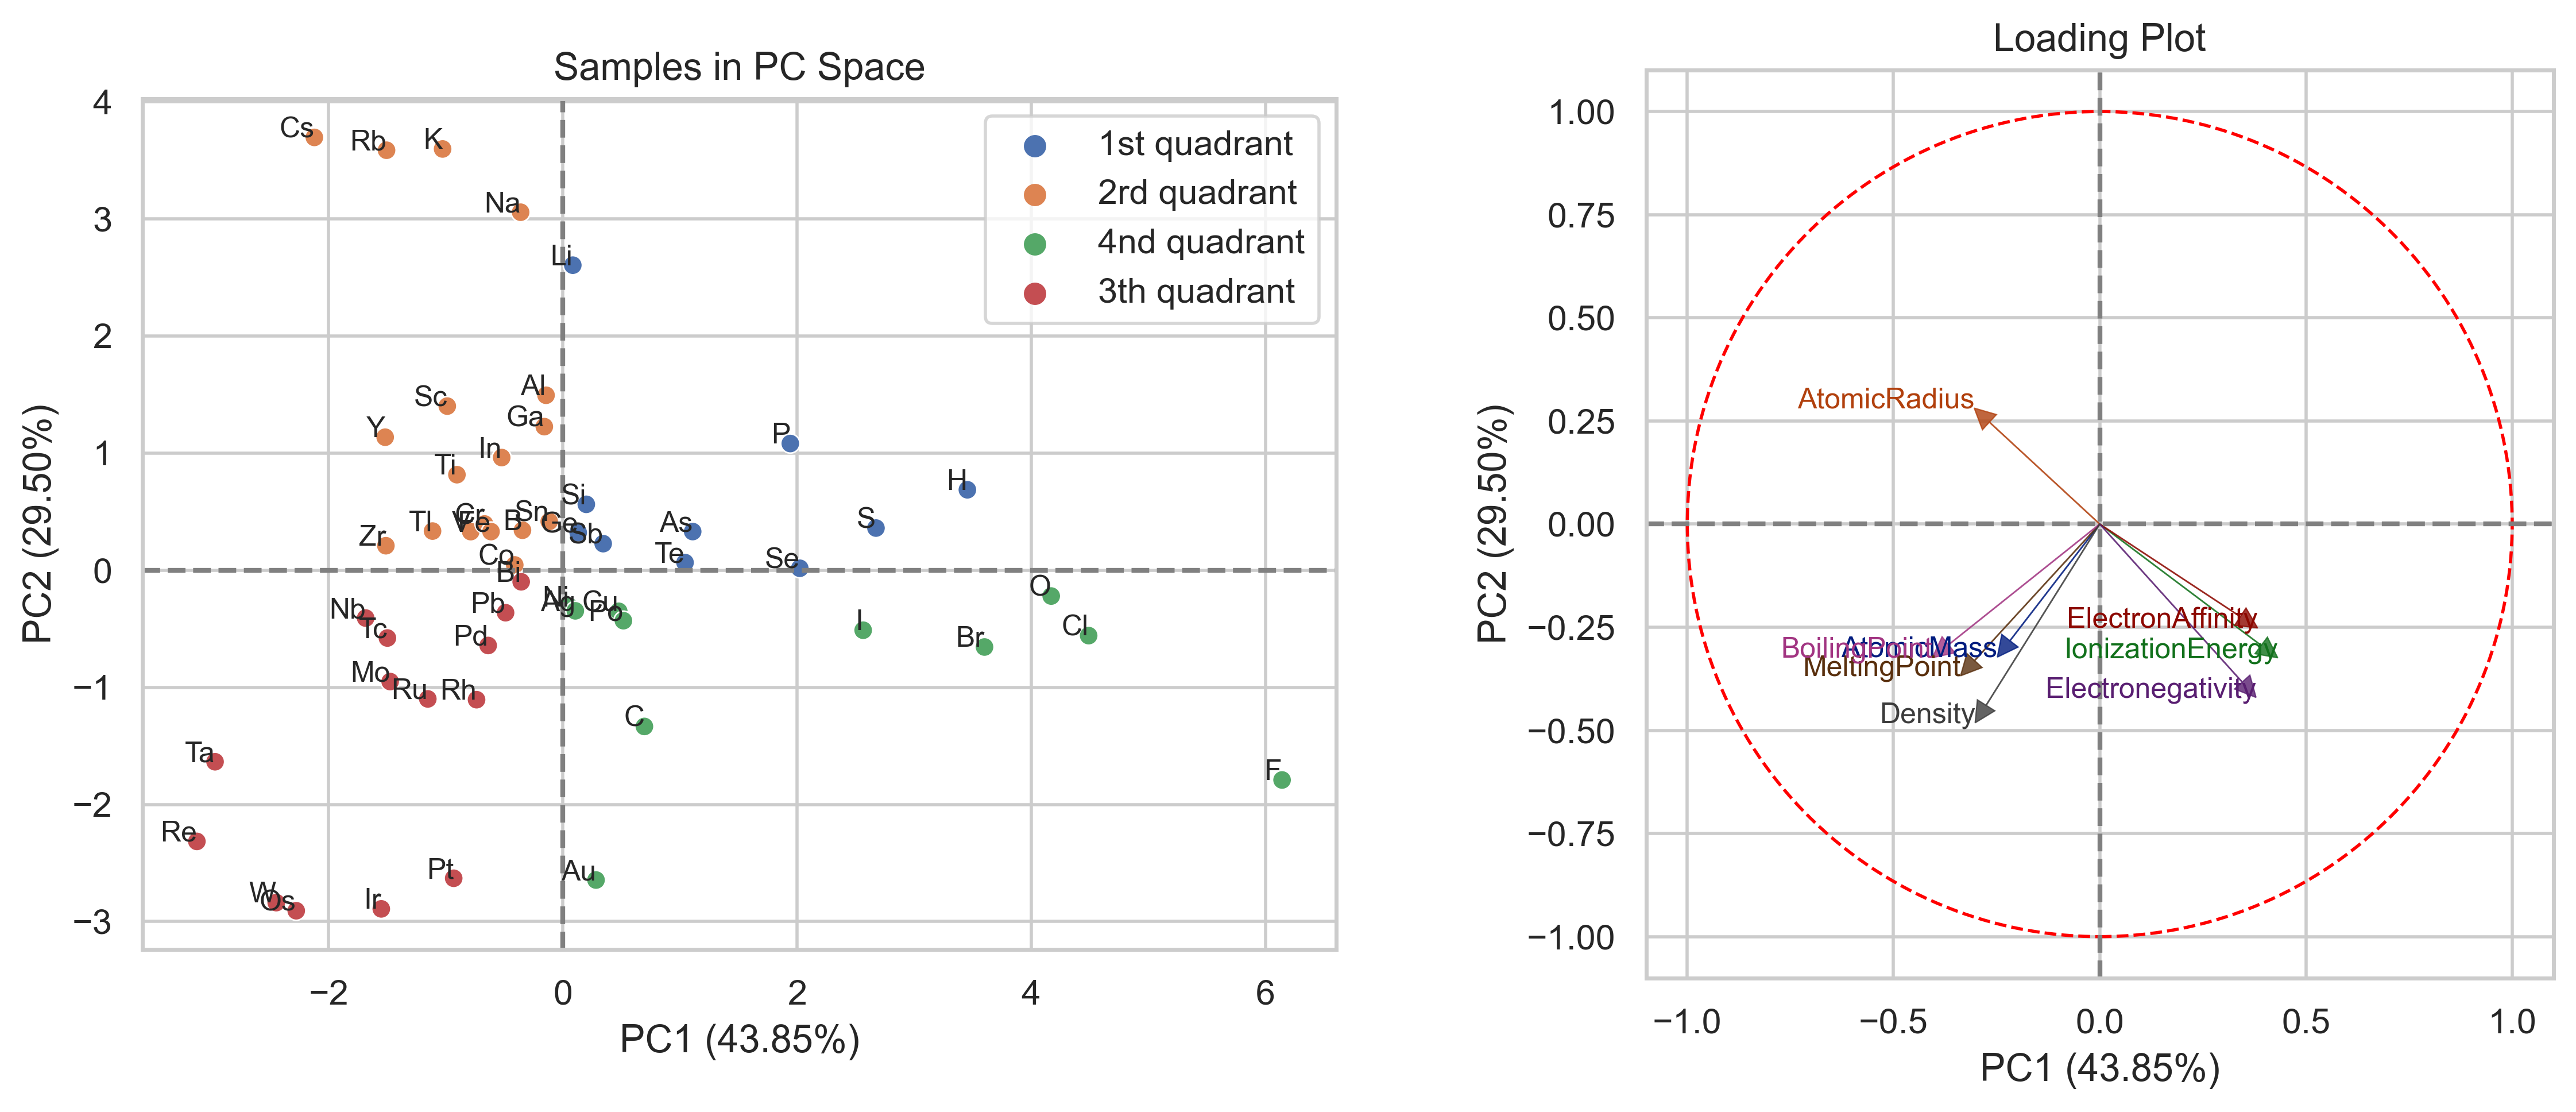

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_pc1_pc2(X_reduced, explained_variance_ratio, components, idxs, feature_cols):
    sns.set(style="whitegrid")  # 设置 seaborn 样式

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=400)

    # 为不同象限的点上色
    quadrant_colors = np.array(['1st quadrant', '4nd quadrant', '2rd quadrant', '3th quadrant'])
    quadrant = 2 * (X_reduced[:, 0] < 0) + (X_reduced[:, 1] < 0)
    colors = quadrant_colors[quadrant]

    # 样本散点图
    sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=colors, ax=ax1)
    ax1.set_aspect('equal', adjustable='box')
    ax1.axhline(y=0, color='grey', linestyle="--")
    ax1.axvline(x=0, color='grey', linestyle="--")
    for i, idx in enumerate(idxs):
        ax1.text(X_reduced[i, 0], X_reduced[i, 1], idx, fontsize=9, ha='right')

    # 主成分载荷图
    ax2.add_patch(plt.Circle((0, 0), 1.0, fill=False, color="red", linestyle="--"))
        # 定义颜色映射
    palette = sns.color_palette("dark", len(feature_cols))

    # 主成分载荷图中的箭头和标签应用不同颜色
    for i in range(components.shape[1]):
        arrow_color = palette[i]
        ax2.arrow(0, 0, components[0, i], components[1, i], 
                  head_width=0.05, head_length=0.05, length_includes_head=True,
                  color=arrow_color, shape='full', lw=0.4, ls='-', alpha=0.8)
        ax2.text(components[0, i], components[1, i], feature_cols[i], fontsize=9, ha='right', color=arrow_color, alpha=1)

    ax2.axhline(y=0, color='grey', linestyle="--")
    ax2.axvline(x=0, color='grey', linestyle="--")
    ax2.set_aspect('equal', adjustable='box')

    # 设置标题和轴标签
    ratio1, ratio2 = explained_variance_ratio
    ax1.set_title("Samples in PC Space")
    ax1.set_xlabel(f"PC1 ({ratio1 * 100:.2f}%)")
    ax1.set_ylabel(f"PC2 ({ratio2 * 100:.2f}%)")
    ax2.set_title("Loading Plot")
    ax2.set_xlabel(f"PC1 ({ratio1 * 100:.2f}%)")
    ax2.set_ylabel(f"PC2 ({ratio2 * 100:.2f}%)")

    plt.tight_layout()
    plt.show()

plot_pc1_pc2(X_reduced, explained_variance_ratio, components, X.index, feature_cols)

1. 四个象限的元素分布：
    - 第一象限：主族非金属元素（包括主族准金属元素）：P、S、H、As、Te、Sb、Ge、Sn、Si...
    - 第二象限：主族金属元素：Li、Na、K、Rb、Cs、Fr、Be、Mg...
        - 还包括第一过渡周期的元素：Sc、Ti、V、Cr...
    - 第三象限：过渡金属元素：Ta、Re、W、Os、Ir、Pt...
    - 第四象限：卤素：F、Cl、Br、I...
        - 还包括主族/过度金属高电负性元素：O、C、Se、Te、Au

2. 回答：
    - 第三象限：(a) 原子聚集行为
    - 第四象限：(b) 电子吸引能力
    - 第二象限：第二象限只分布有一个原始特征，即原子半径，它与第四象限的那些特征具有较强的“负相关性”：
        - 原子半径越大，对电子的吸引能力越弱，电子亲和能越小，电离能越小，电负性越小.

# 隐空间上的聚类分析

$\quad$我们在降维后的隐空间上进行k-means聚类, 并对聚类结果进行评估. 具体试验的降维算法将包括PCA、Isomap与t-SNE, 均控制为降到3维. 由于聚类分析是非监督的, 它没有类似“准确率”这样的评估指标, 本节我们采取的指标有两个:
- (调整的)随机指数相似性, 以[`adjusted_rand_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score)方法实现. 这一指标适合本例的情形, 即存在一组真实标签作为对照. 该指标大致可以理解为真实标签与预测标签在“分配结构”上的相似性.
- **轮廓系数**(silhouette coefficient), 以[`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn-metrics-silhouette-score)方法实现. 该指标大致可以理解为簇间轮廓的清晰程度(的样本平均), 计算公式为:
  $$
  S := \frac{1}{N}\sum_{n=1}^N{\frac{b_n - a_n}{\max{\{a_n, b_n\}}}},
  $$
  其中, $n = 1, \dots, N$遍历所有数据样本, $a_n, b_n$分别表示样本$n$到点$A_n, B_n$的距离. 其中, 点$A_n$为样本$n$所在的簇中心, 点$B_n$为样本$n$所不在的、最近邻的簇中心.

**任务4**: 完成函数`cluster_on_latent_space`的编写, 输入:
- `X`, 待降维的数据;
- `reduction_model`, 用于降维的模型;
- `y_true`, 真实标签, 本例取为原始表格中的`GroupBlock`一列, 代表元素所属的类别(例如: 碱金属、过渡金属、非金属, 等等);
- `n_clusters`: 簇的个数. 为了与真实标签保持统一, 本例默认值取为7, 无需修改.
- `random_state`: 用于运行k-means算法的随机数种子. 默认取42, 无需修改.

要求对给定的数据`X`利用`reduction_model`进行降维, 再以k-means方法进行聚类分析, 并对聚类结果进行评估. 返回一个二元组: 随机指数相似性、轮廓系数.

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from typing import Tuple

def cluster_on_latent_space(
    X, reduction_model, y_true,
    n_clusters: int = 7, random_state: int = 42
) -> Tuple[float, float]:
    # 降维
    X_reduced = reduction_model.fit_transform(X)

    # 应用 K-means 聚类
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    y_pred = kmeans.fit_predict(X_reduced)

    # 计算调整后的随机指数相似性
    ari = adjusted_rand_score(y_true, y_pred)

    # 计算轮廓系数
    silhouette = silhouette_score(X_reduced, y_pred)

    return ari, silhouette


$\quad$完成任务3后, 你可以运行下面的代码块, 对PCA、Isomap和t-SNE的聚类结果进行综合评估.

In [56]:
from sklearn.manifold import Isomap, TSNE
from sklearn.preprocessing import LabelEncoder

metrics = pd.DataFrame(columns=["rand_acc", "silhouette_coeff"], index=["PCA", "Isomap", "t-SNE"])

y_true = LabelEncoder().fit_transform(raw_data["GroupBlock"])
n_components = 3
for reduction_model, name in (
    (PCA(n_components=n_components), "PCA"),
    (Isomap(n_components=n_components), "Isomap"),
    (TSNE(n_components=n_components, init="pca", learning_rate="auto", perplexity=30), "t-SNE")
):
    rand_acc, silhouette_coeff = cluster_on_latent_space(X, reduction_model, y_true)
    metrics.loc[name, "rand_acc"] = rand_acc
    metrics.loc[name, "silhouette_coeff"] = silhouette_coeff

metrics

,rand_acc,silhouette_coeff
PCA,0.238068,0.3016
Isomap,0.274553,0.373478
t-SNE,0.0291,0.216043


根据提供的结果，我们可以对 PCA、Isomap 和 t-SNE 这三种降维方法在聚类任务上的表现进行综合评估。这里的评估主要基于两个指标：调整后的随机指数相似性（Adjusted Rand Index, ARI）和轮廓系数。

1. **调整后的随机指数相似性 (ARI)**:
   - ARI 是一个介于 -1 和 1 之间的值，其中 1 表示完美的聚类，0 表示随机聚类，负值表示聚类效果低于随机水平。
   - 在您的结果中，Isomap 的 ARI 最高（0.274553），其次是 PCA（0.238068），t-SNE 最低（0.0291）。这表明在这种特定的场景中，Isomap 提供了与真实标签最相似的聚类结构，而 t-SNE 的聚类质量相对较差。

2. **轮廓系数**:
   - 轮廓系数的范围也是从 -1 到 1，其中较高的值表明聚类具有较好的凝聚性和分离性。
   - 根据您的结果，Isomap 同样在轮廓系数上表现最佳（0.373478），接着是 PCA（0.3016），t-SNE 最低（0.216043）。这意味着 Isomap 聚类后的簇在内部更加紧密，同时与其他簇的距离更远。

**综合评估**:

- **Isomap** 在这两个指标上均表现最佳，显示出了最佳的聚类性能。这表明在降维后的空间中，Isomap 方法能更好地保持原始数据的结构，从而产生了更准确和清晰的聚类。
- **PCA** 的表现介于 Isomap 和 t-SNE 之间，虽然在 ARI 和轮廓系数上均低于 Isomap，但仍然显示出了相对较好的聚类性能。
- **t-SNE** 在这两个指标上都表现最差。尽管 t-SNE 通常在可视化高维数据时表现出色，但在这个特定的聚类任务中，它的性能较差。

总的来说，根据这些评估指标，Isomap 在这三种方法中表现最佳，其次是 PCA，而 t-SNE 在本次实验中的聚类性能相对较差。需要注意的是，这些结果可能受到数据特性和选择的参数（例如 t-SNE 的学习率和困惑度）的影响。不同的数据集和参数设置可能会导致不同的结果。

### 可视化聚类

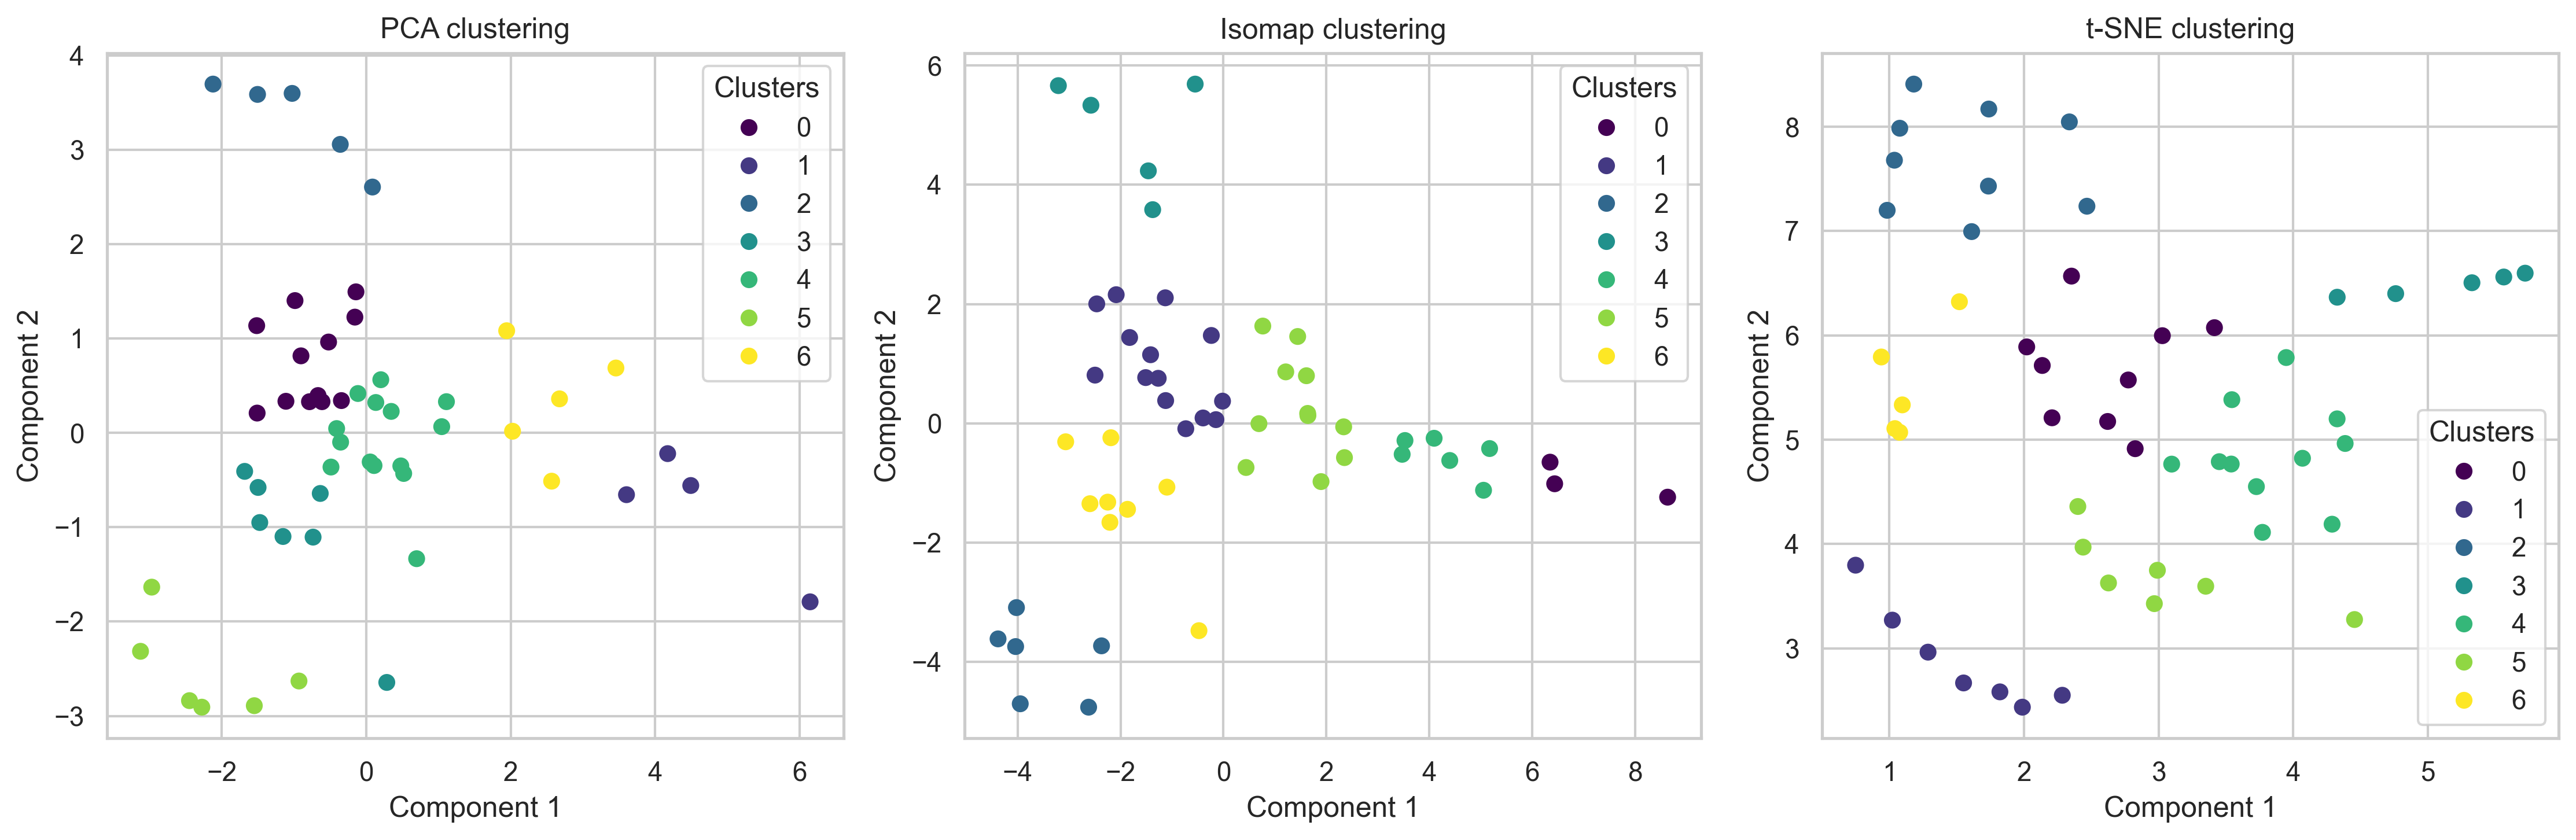

In [57]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 假设 X 是原始数据，raw_data 包含 GroupBlock 列
y_true = LabelEncoder().fit_transform(raw_data["GroupBlock"])
n_components = 3
n_clusters = 7
random_state = 42

# 初始化降维模型和 KMeans
models = [
    (PCA(n_components=n_components), "PCA"),
    (Isomap(n_components=n_components), "Isomap"),
    (TSNE(n_components=2, init="pca", learning_rate="auto", perplexity=30, random_state=random_state), "t-SNE")
]
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

# 绘制图表
fig, axes = plt.subplots(1, len(models), figsize=(15, 5), dpi = 300)
for ax, (model, name) in zip(axes, models):
    # 降维
    X_reduced = model.fit_transform(X)
    
    # 聚类
    y_pred = kmeans.fit_predict(X_reduced[:, :2])  # 仅使用前两个成分进行聚类

    # 可视化
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='viridis', label=y_pred)
    ax.set_title(f'{name} clustering')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.legend(*scatter.legend_elements(), title="Clusters")

plt.tight_layout()
plt.show()

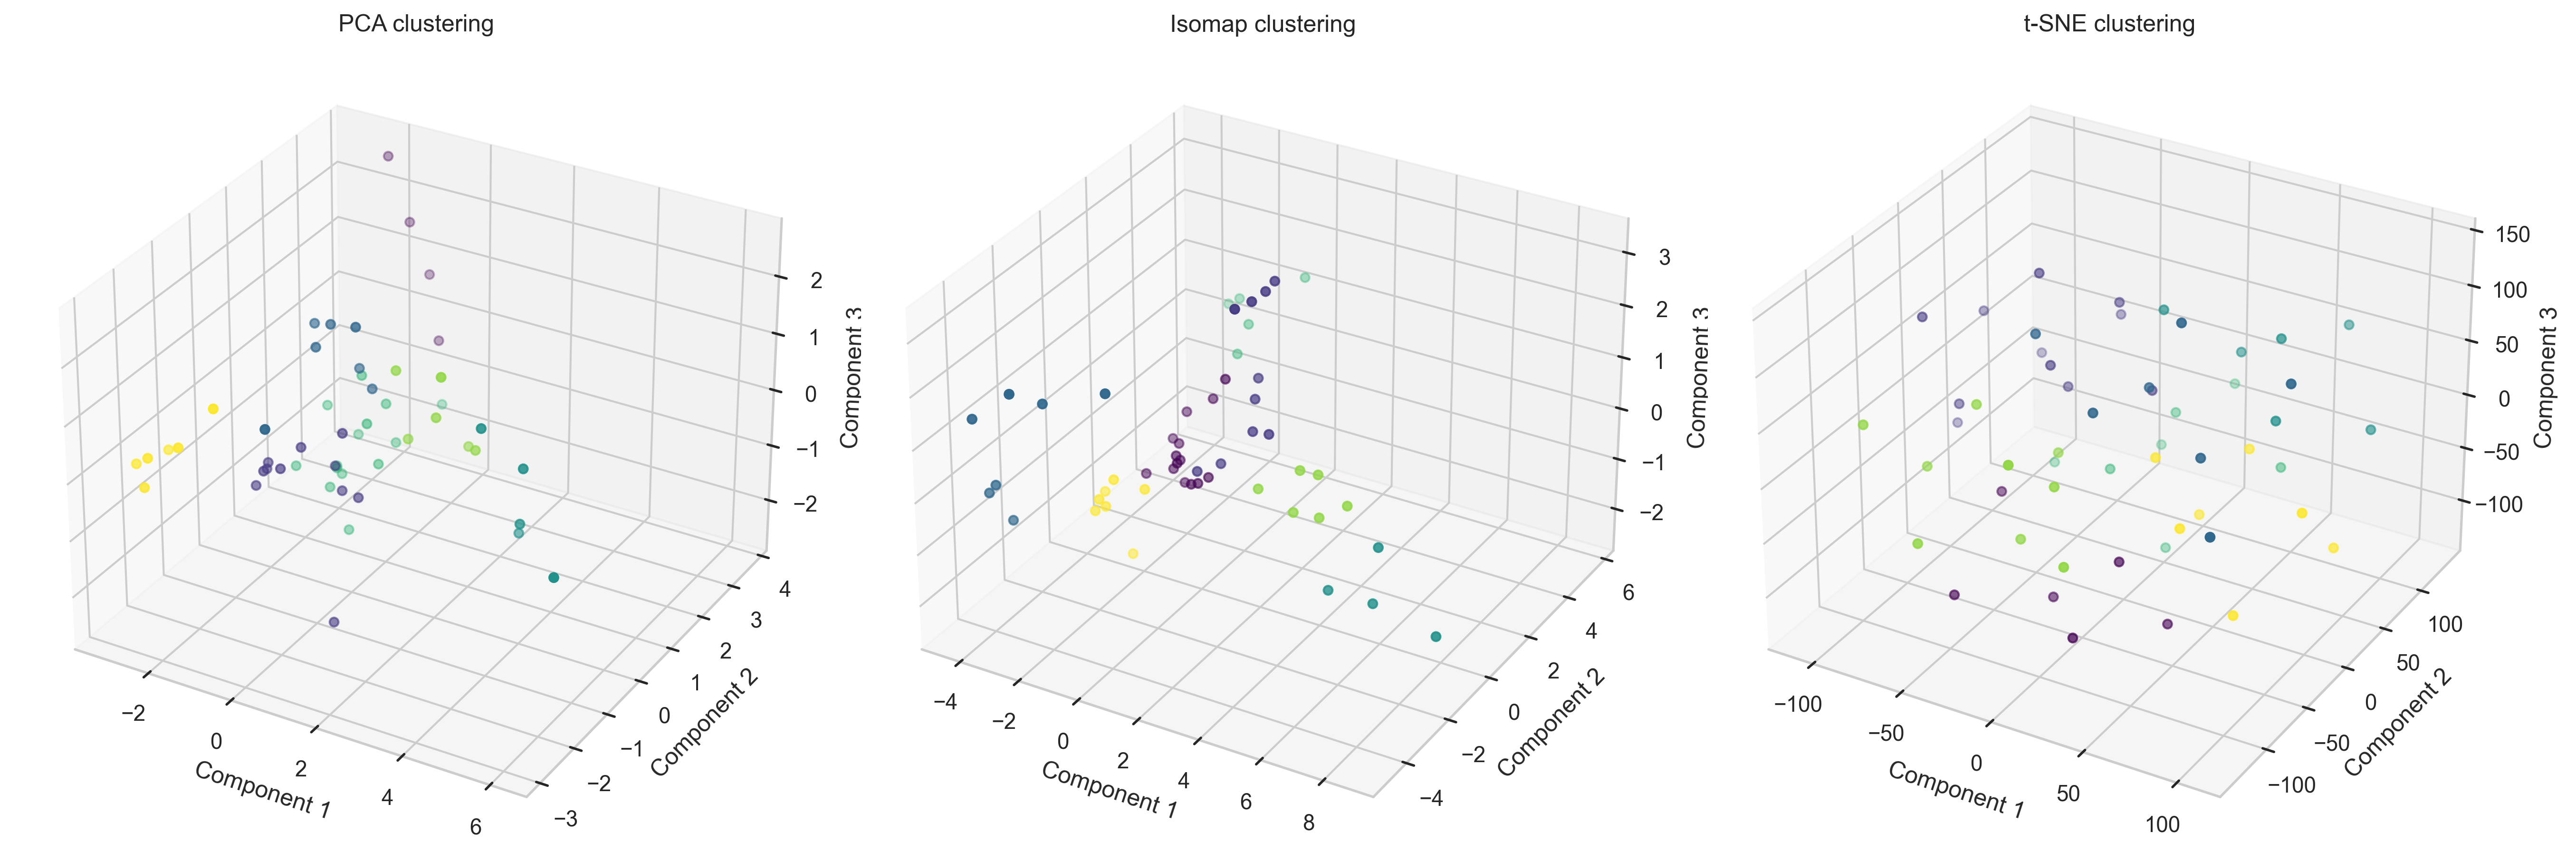

In [58]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# 假设 X 是原始数据，raw_data 包含 GroupBlock 列
y_true = LabelEncoder().fit_transform(raw_data["GroupBlock"])
n_components = 3
n_clusters = 7
random_state = 42

# 初始化降维模型和 KMeans
models = [
    (PCA(n_components=n_components), "PCA"),
    (Isomap(n_components=n_components), "Isomap"),
    (TSNE(n_components=n_components, init="pca", learning_rate="auto", perplexity=30, random_state=random_state), "t-SNE")
]
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

# 绘制图表
fig = plt.figure(figsize=(18, 6), dpi=300)
for i, (model, name) in enumerate(models, 1):
    ax = fig.add_subplot(1, len(models), i, projection='3d')
    
    # 降维
    X_reduced = model.fit_transform(X)
    
    # 聚类
    y_pred = kmeans.fit_predict(X_reduced)

    # 可视化
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_pred, cmap='viridis')
    ax.set_title(f'{name} clustering')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')

plt.tight_layout()
plt.show()